In [118]:
import pandas as pd
import numpy as np
import os

In [119]:
datos = pd.read_csv(filepath_or_buffer = "/Users/luish/Desktop/Programacion/Extraccion de Conocimientos de BD/UTEQ/MOCK_DATA.csv")

In [120]:
datos

id first_name   last_name                        email  gender  age  \
0      1    Nickola       Heugh               nheugh0@cbc.ca    Male   41   
1      2     Arturo   Danelutti  adanelutti1@dagondesign.com    Male   56   
2      3     Belita  Tollemache         btollemache2@psu.edu  Female   43   
3      4     Siward     Budcock      sbudcock3@quantcast.com    Male   24   
4      5      Shane   Hunsworth        shunsworth4@wiley.com    Male   63   
..   ...        ...         ...                          ...     ...  ...   
495  496  Grenville     Tireman     gtiremandr@google.com.au    Male   29   
496  497    Patrice       Paine        ppaineds@china.com.cn    Male   34   
497  498    Lorenza    Chessill        lchessilldt@issuu.com  Female   27   
498  499     Gabbie     Wethers        gwethersdu@tumblr.com  Female   23   
499  500   Adelheid      Pardon         apardondv@smh.com.au  Female   41   

     purchases        date  
0            2  12/22/2021  
1           13    9/3/2021  
2            4   8/29/2021  
3            7   9/26/2021  
4            3  11/30/2021  
..         ...         ...  
495         13   8/15/2021  
496         13    9/5/2021  
497         12    3/7/2022  
498         13  11/10/2021  
499          5   9/16/2021  

[500 rows x 8 columns]

In [121]:
# Describe devuelve unícamente datos numéricos
datos.describe()

id         age   purchases
count  500.000000  500.000000  500.000000
mean   250.500000   41.854000    7.952000
std    144.481833   14.301249    4.365296
min      1.000000   18.000000    1.000000
25%    125.750000   29.000000    4.000000
50%    250.500000   43.000000    8.000000
75%    375.250000   54.000000   12.000000
max    500.000000   65.000000   15.000000

In [122]:
# Detalles de los tipos de datos que existen 
datos.dtypes

id             int64
first_name    object
last_name     object
email         object
gender        object
age            int64
purchases      int64
date          object
dtype: object

In [123]:
datos2 = datos.loc[:,['id','gender','age','purchases',]]
datos3 = datos.loc[:,['id','gender','age','purchases',]]

In [124]:
datos2

id  gender  age  purchases
0      1    Male   41          2
1      2    Male   56         13
2      3  Female   43          4
3      4    Male   24          7
4      5    Male   63          3
..   ...     ...  ...        ...
495  496    Male   29         13
496  497    Male   34         13
497  498  Female   27         12
498  499  Female   23         13
499  500  Female   41          5

[500 rows x 4 columns]

In [125]:
vartemp = pd.get_dummies(datos2['gender'],prefix='gender')
vartemp

gender_Female  gender_Male
0                0            1
1                0            1
2                1            0
3                0            1
4                0            1
..             ...          ...
495              0            1
496              0            1
497              1            0
498              1            0
499              1            0

[500 rows x 2 columns]

In [126]:
# Tecnica de agregación 
vargender = {'Female':0, 'Male':1}

In [127]:
datos3['gender'] = datos3['gender'].map(vargender)
datos3

id  gender  age  purchases
0      1       1   41          2
1      2       1   56         13
2      3       0   43          4
3      4       1   24          7
4      5       1   63          3
..   ...     ...  ...        ...
495  496       1   29         13
496  497       1   34         13
497  498       0   27         12
498  499       0   23         13
499  500       0   41          5

[500 rows x 4 columns]

In [128]:
rangos = [18,25,35,45,55,65,75]
print(datos3['age'].groupby(pd.cut(datos3.age, rangos, right=False)).count())

age
[18, 25)     81
[25, 35)     91
[35, 45)    108
[45, 55)     99
[55, 65)    107
[65, 75)     14
Name: age, dtype: int64


In [129]:
cuenta_rangos = datos3['age'].groupby(pd.cut(datos3.age, rangos)).count()
cuenta_rangos

age
(18, 25]     79
(25, 35]     85
(35, 45]    105
(45, 55]    104
(55, 65]    112
(65, 75]      0
Name: age, dtype: int64

In [130]:
cuenta_rangos2 = datos3['age'].groupby(pd.cut(datos3.age,rangos, right=False)).count()
cuenta_rangos2

age
[18, 25)     81
[25, 35)     91
[35, 45)    108
[45, 55)     99
[55, 65)    107
[65, 75)     14
Name: age, dtype: int64

In [131]:
datos3['age-range'] = pd.cut(datos3['age'], bins=[15,25,35,45,55,65,75], right=False)
datos3

id  gender  age  purchases age-range
0      1       1   41          2  [35, 45)
1      2       1   56         13  [55, 65)
2      3       0   43          4  [35, 45)
3      4       1   24          7  [15, 25)
4      5       1   63          3  [55, 65)
..   ...     ...  ...        ...       ...
495  496       1   29         13  [25, 35)
496  497       1   34         13  [25, 35)
497  498       0   27         12  [25, 35)
498  499       0   23         13  [15, 25)
499  500       0   41          5  [35, 45)

[500 rows x 5 columns]

In [132]:
datos3.groupby('age').size()

age
18    15
19     9
20    10
21     8
22     8
23    17
24    14
25    13
26    14
27    10
28     4
29     7
30     8
31    10
32     4
33    11
34    10
35     7
36    12
37    13
38     8
39     9
40    10
41    11
42     7
43    14
44    17
45     4
46     8
47    13
48    10
49    12
50    10
51     5
52    13
53    10
54    14
55     9
56    10
57     4
58    15
59    13
60     8
61    13
62    11
63    13
64    11
65    14
dtype: int64

In [133]:
datos3.groupby(by = ['gender', 'age', 'purchases']).mean()

id
gender age purchases            
0      18  5          266.666667
           9          103.000000
           14         108.000000
       19  4          349.000000
           11         315.000000
...                          ...
1      65  5          307.500000
           8           70.000000
           11          72.000000
           12         243.000000
           15          92.000000

[432 rows x 1 columns]

<AxesSubplot:ylabel='Density'>

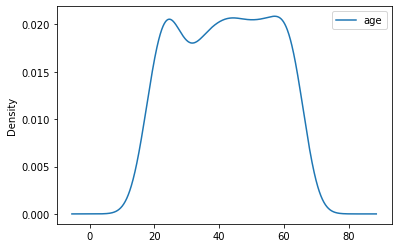

In [136]:
datos3['age'].plot(legend=True, kind='kde')


In [137]:
X = datos3.loc[:,['id', 'age', 'purchases']]
Y = datos3.loc[:,['gender']]

In [139]:
X

id  age  purchases
0      1   41          2
1      2   56         13
2      3   43          4
3      4   24          7
4      5   63          3
..   ...  ...        ...
495  496   29         13
496  497   34         13
497  498   27         12
498  499   23         13
499  500   41          5

[500 rows x 3 columns]

In [141]:
Y

gender
0         1
1         1
2         0
3         1
4         1
..      ...
495       1
496       1
497       0
498       0
499       0

[500 rows x 1 columns]

In [143]:
from sklearn.model_selection import train_test_split
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)


In [147]:
X_entrena

id  age  purchases
445  446   63         12
250  251   22         10
481  482   59          9
16    17   51          6
314  315   37          2
..   ...  ...        ...
285  286   58          9
154  155   58          8
209  210   38          6
411  412   54          7
498  499   23         13

[350 rows x 3 columns]

In [149]:
X_prueba

id  age  purchases
319  320   34         15
266  267   56         11
297  298   23         13
331  332   22          3
272  273   21         13
..   ...  ...        ...
381  382   30          8
207  208   61          3
7      8   25          9
198  199   52         11
407  408   40         10

[150 rows x 3 columns]